In [1]:
import astropy
import lightkurve as lk
import matplotlib.pyplot as plt

In [ ]:
TIC = 'TIC 66818296' #WASP-17 / TIC 66818296
search_result = lk.search_lightcurve(
        target=TIC,
        mission='TESS', author='SPOC')
lc_collection = search_result.download_all()
lc = lc_collection.stitch(corrector_func=lambda x: x.
                          remove_nans().normalize(unit='unscaled'))
lc = lc.remove_outliers(sigma=10)

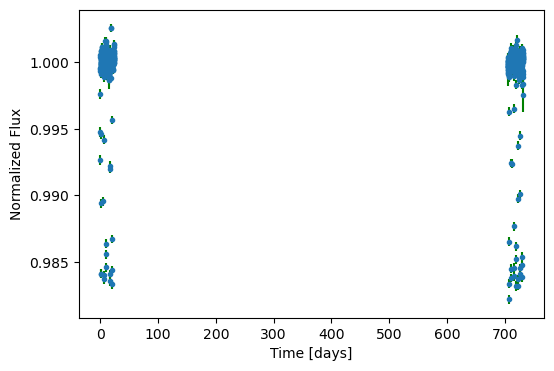

In [ ]:


fig = plt.figure(figsize=(10,4))

# plt.errorbar(lc.time.mjd-lc.time[0].mjd, lc.flux, lc.flux_err, fmt='.', ecolor='LightGrey')
lc_bin = lc.bin(time_bin_size = 0.05) # Default time is in days
plt.errorbar(lc_bin.time.mjd-lc_bin.time[0].mjd, lc_bin.flux, lc_bin.flux_err, fmt='.', ecolor='green')

plt.xlabel('Time [days]')
plt.ylabel('Normalized Flux')
plt.show()